In [1]:
from keras.datasets import fashion_mnist
(train_X,train_Y), (test_X,test_Y) = fashion_mnist.load_data()

Using TensorFlow backend.


In [2]:
import numpy as np
from keras.utils import to_categorical
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
train_X.shape, train_Y.shape 

((60000, 28, 28), (60000,))

In [4]:
test_X.shape, test_Y.shape

((10000, 28, 28), (10000,))

In [5]:
np.unique(train_Y, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))

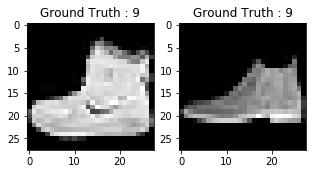

In [6]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_Y[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_Y[0]))

In [7]:
train_X = train_X.reshape(-1, 28,28, 1)
test_X = test_X.reshape(-1, 28,28, 1)

In [8]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')

# recaling pixel values in the range 0 to 1
train_X = train_X / 255. 
test_X = test_X / 255.

In [9]:
# Change the labels from categorical to one-hot encoding
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

# Display the change for category label using one-hot encoding
print('Original label:', train_Y[111])
print('After conversion to one-hot:', train_Y_one_hot[111])

Original label: 9
After conversion to one-hot: [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]


In [10]:
from sklearn.model_selection import train_test_split
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=29)

In [11]:
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

In [16]:
batch_size = 64
epochs = 15
num_classes = 10

In [14]:
my_model = Sequential()
my_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(28,28,1),padding='same'))
my_model.add(LeakyReLU(alpha=0.3))
my_model.add(MaxPooling2D((2, 2),padding='same'))
my_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
my_model.add(LeakyReLU(alpha=0.3))
my_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
my_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
my_model.add(LeakyReLU(alpha=0.3))                  
my_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
my_model.add(Flatten())
my_model.add(Dense(128, activation='linear'))
my_model.add(LeakyReLU(alpha=0.3))                  
my_model.add(Dense(num_classes, activation='softmax'))

In [17]:
my_model.compile(loss=keras.losses.categorical_crossentropy, 
                 optimizer=keras.optimizers.Adam(), 
                 metrics=['accuracy'])

### Training the Model

In [18]:
my_model_train = my_model.fit(train_X, train_label, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(valid_X, valid_label))

Train on 48000 samples, validate on 12000 samples
Epoch 1/15
48000/48000 [==============================] - 69s 1ms/step - loss: 0.4582 - acc: 0.8346 - val_loss: 0.3188 - val_acc: 0.8866
Epoch 2/15
48000/48000 [==============================] - 71s 1ms/step - loss: 0.2864 - acc: 0.8959 - val_loss: 0.2694 - val_acc: 0.9017
Epoch 3/15
48000/48000 [==============================] - 73s 2ms/step - loss: 0.2420 - acc: 0.9104 - val_loss: 0.2551 - val_acc: 0.9076
Epoch 4/15
48000/48000 [==============================] - 72s 1ms/step - loss: 0.2111 - acc: 0.9224 - val_loss: 0.2413 - val_acc: 0.9133
Epoch 5/15
48000/48000 [==============================] - 69s 1ms/step - loss: 0.1843 - acc: 0.9319 - val_loss: 0.2368 - val_acc: 0.9177
Epoch 6/15
48000/48000 [==============================] - 70s 1ms/step - loss: 0.1610 - acc: 0.9402 - val_loss: 0.2309 - val_acc: 0.9187
Epoch 7/15
48000/48000 [==============================] - 70s 1ms/step - loss: 0.1412 - acc: 0.9487 - val_loss: 0.2467 - val_acc

### Model Evaluation on the Test Set

In [19]:
test_eval = my_model.evaluate(test_X, test_Y_one_hot, verbose=1)

10000/10000 [==============================] - 5s 508us/step


In [21]:
print('Test Dataset Loss: ', test_eval[0])
print('Test Dataset Accuracy: ', test_eval[1])

Test Dataset Loss:  0.415009062642
Test Dataset Accuracy:  0.9126


In [22]:
predicted_classes = my_model.predict(test_X)

In [29]:
predicted_label = np.argmax(np.round(predicted_classes), axis=1)

In [31]:
correct = np.where(predicted_label == test_Y)[0]
incorrect = np.where(predicted_label != test_Y)[0]

In [36]:
print(str(len(correct)) + " items classified correctly")
print(str(len(incorrect)) + " items misclassified")

9122 items classified correctly
878 items misclassified
